In [5]:
# Modules for Data Manipulation
import numpy as np
import pandas as pd

# Modules for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Module to control warning
import warnings

# Module for Statistical Analysis
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Modules for Data Sampling
from sklearn.model_selection import train_test_split as split

# Module for Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

# Module for pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

# Module for scaling and normalizing
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint

# Modules for resampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline

# Module for feature selection and dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE

# Modules for Machine Model Algorithms
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsRegressor

# Modules for model evaluation
from sklearn.metrics import classification_report, accuracy_score

# Modules for cross validation 
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Module for data serialization
import pickle

## Load The Dataset
Load the dataset in 'csv' format into the python environment

In [6]:
# Load the given dataset as 'credit_df'
credit_df = pd.read_csv('credit.csv')

## Data Preprocessing

In [7]:
# Get the column names of the 'credit_df' dataset
credit_df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [8]:
# Get the shape of the 'credit_df'
df_shape = credit_df.shape

# Print the number of features and observations
print(f"Number of Features:{df_shape[1]-1}")
print(f"Number of Observations:{df_shape[0]}")

Number of Features:27
Number of Observations:100000


In [9]:
# Display information about the 'credit_df'
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

### Missing Values

In [10]:
# Check missing value
if not credit_df.isna().sum().any():
    print("'credit_df' does not have any null values.")

'credit_df' does not have any null values.


### Duplicate Values

In [11]:
# Check duplicate value
if not credit_df.duplicated().any():
    print("'credit_df' does not have any duplicate value.")

'credit_df' does not have any duplicate value.


### Outliers Checking and Handling 

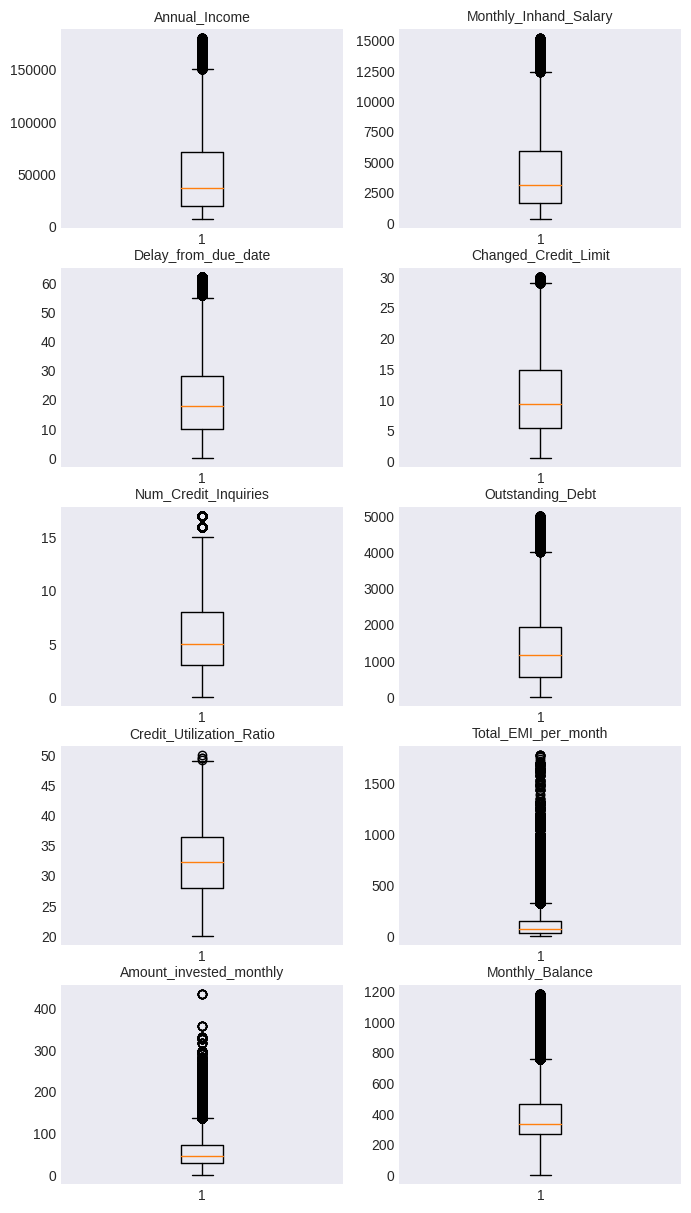

In [12]:
# Define the columns with potential outliers
outlier_columns = ['Annual_Income', 'Monthly_Inhand_Salary', 
                   'Delay_from_due_date', 'Changed_Credit_Limit',
                   'Num_Credit_Inquiries', 'Outstanding_Debt',
                   'Credit_Utilization_Ratio', 'Total_EMI_per_month',
                   'Amount_invested_monthly', 'Monthly_Balance',]

# Set the plot style and figure size
plt.style.use('seaborn-v0_8-dark')
plt.figure(figsize=(8,15))

# Iterate through the outlier columns and create boxplots
for n,i in zip(range(1,11),range(0,10)):
    plt.subplot(5,2,n)
    plt.boxplot(credit_df[outlier_columns[i]])   
    plt.title(outlier_columns[i], fontsize=10)

# Display the plot
plt.show()

According to statistical experts, <b style="color:yellow">median</b> values are better for replacing outliers, as they tend to be less affected by extreme values compared to mean values.

In [13]:
# Define a function to list out the outlier values
def detect_outliers_iqr(data):    
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.25*IQR)
    upr_bound = q3+(1.25*IQR)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

# Impute outliers with median value
for feature in outlier_columns:
    outliers = detect_outliers_iqr(credit_df[feature])
    impute_value = credit_df[feature].median()
    filter = credit_df[feature] >= np.min(outliers)
    credit_df.loc[filter,feature] = impute_value   

### Drop Irrelevant Features

In [14]:
# Drop Irrelevant features which only redundant identification
credit_df.drop(['Name','ID','SSN'],axis=1, inplace=True)

## Exploratory Data Analysis (EDA)

### Target Variable

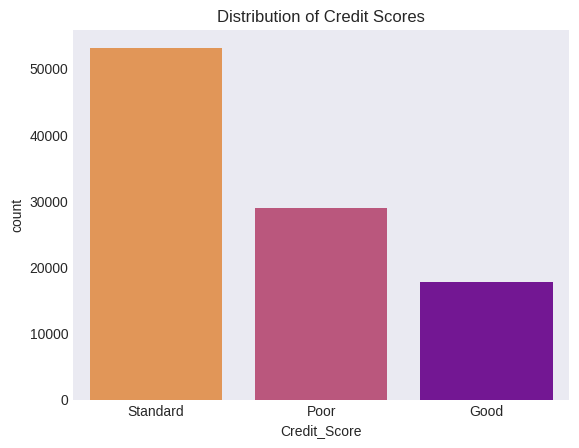

In [11]:
# Set the style and create a count plot
sns.countplot(data=credit_df, x='Credit_Score', palette='plasma_r',
              order=credit_df['Credit_Score'].value_counts().index)
plt.title('Distribution of Credit Scores')
plt.show()

In [12]:
# Calculate the percentage of each target class
target_pc = credit_df.Credit_Score.value_counts(normalize=True)

# Count the occurrences of each target class
target_count = credit_df.Credit_Score.value_counts()

# Index of target in the order of occurace
target_name = credit_df['Credit_Score'].value_counts().index

# Print the target variable count and percentage
print("Target Variable Count (%)","\nCredit_Score")
print(f"{target_name[0]} {target_count[0]} ({round(target_pc[0]*100,2)})")
print(f"{target_name[1]} {target_count[1]} ({round(target_pc[1]*100,2)})")
print(f"{target_name[2]} {target_count[2]} ({round(target_pc[2]*100,2)})")
print('-'*30)

# Calculate and print the class imbalance ratio
# imbalace ration = majority class / minority class
majority_pc = round(target_pc[0]*100,2)
minority_pc = round(target_pc[-1]*100,2)
imbalance_ratio = majority_pc / minority_pc
print(f"Class Imbalance Ratio: {round(imbalance_ratio,2)}")

Target Variable Count (%) 
Credit_Score
Standard 53174 (53.17)
Poor 28998 (29.0)
Good 17828 (17.83)
------------------------------
Class Imbalance Ratio: 2.98


Class Imbalance Ration Table:
<table>
    <tr>
        <td>Ratio</td>
        <td>Imbalance Classification</td>
    </tr>
    <tr>
        <td>1 to 1.5</td><td>Low Imbalance</td>
    </tr>
    <tr>
        <td>1.5 to 10</td><td>Mild Imbalance</td>
    </tr>
    <tr>
        <td>10 or above</td><td>High Imbalance</td>
    </tr>
</table>

<p> As indicated in the table, our dataset exhibits <b style="color:yellow">mild imbalance</b>, but this can be addressed by employing various model algorithms during the modeling process.</p>

### Checking Collinearity

#### Heatmap
Analyzing the collinearity of categorical values is a challenging approach, but it may still be possible to identify some patterns.

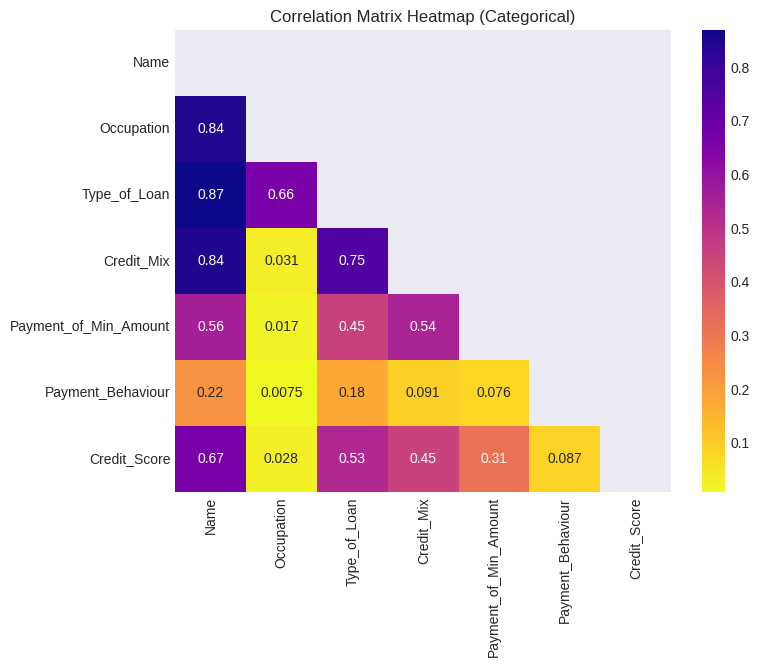

In [13]:
# Select categorical columns from the dataset
credit_cat = credit_df[credit_df.select_dtypes(include='object').columns]

# Define Cramer's function to convert categorical values to numerical values
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Calculate Cramér's V for each pair of categorical variables
correlation_matrix = pd.DataFrame(index=credit_cat.columns, 
                                  columns=credit_cat.columns)
for i in credit_cat.columns:
    for j in credit_cat.columns:
        correlation_matrix.loc[i, j] = cramers_v(credit_cat[i], credit_cat[j])

# Set the figure size
plt.figure(figsize=(8, 6))

#Create a heatmap for the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
heatmap = sns.heatmap(correlation_matrix.astype(float),
                      cmap='plasma_r', annot=True, mask=mask)

# Set the title of the plot
plt.title('Correlation Matrix Heatmap (Categorical)')

# Display the plot
plt.show()

<p>Collinearity of categorical values is a challenging endeavor, unlike the correlation of numerical features, as it may not exhibit clear linear patterns.</p>
<p>Positive collinearity is observed between the following pairs:</p>
<ul>
    <li> Name and Type_of_Loan </li>
    <li> Name and Occupation</li>
    <li> Name and Credit_Mix </li>
    <li> Credit_Mix and Type_of_Loan </li>
    <li> Occupation and Type_of_Loan </li>
</ul>

<p>However, collinearity with the target variable is only exhibited by the 'Name' feature. This suggests that the linearity is related to the individual customer in the case of categorical analysis.</p>

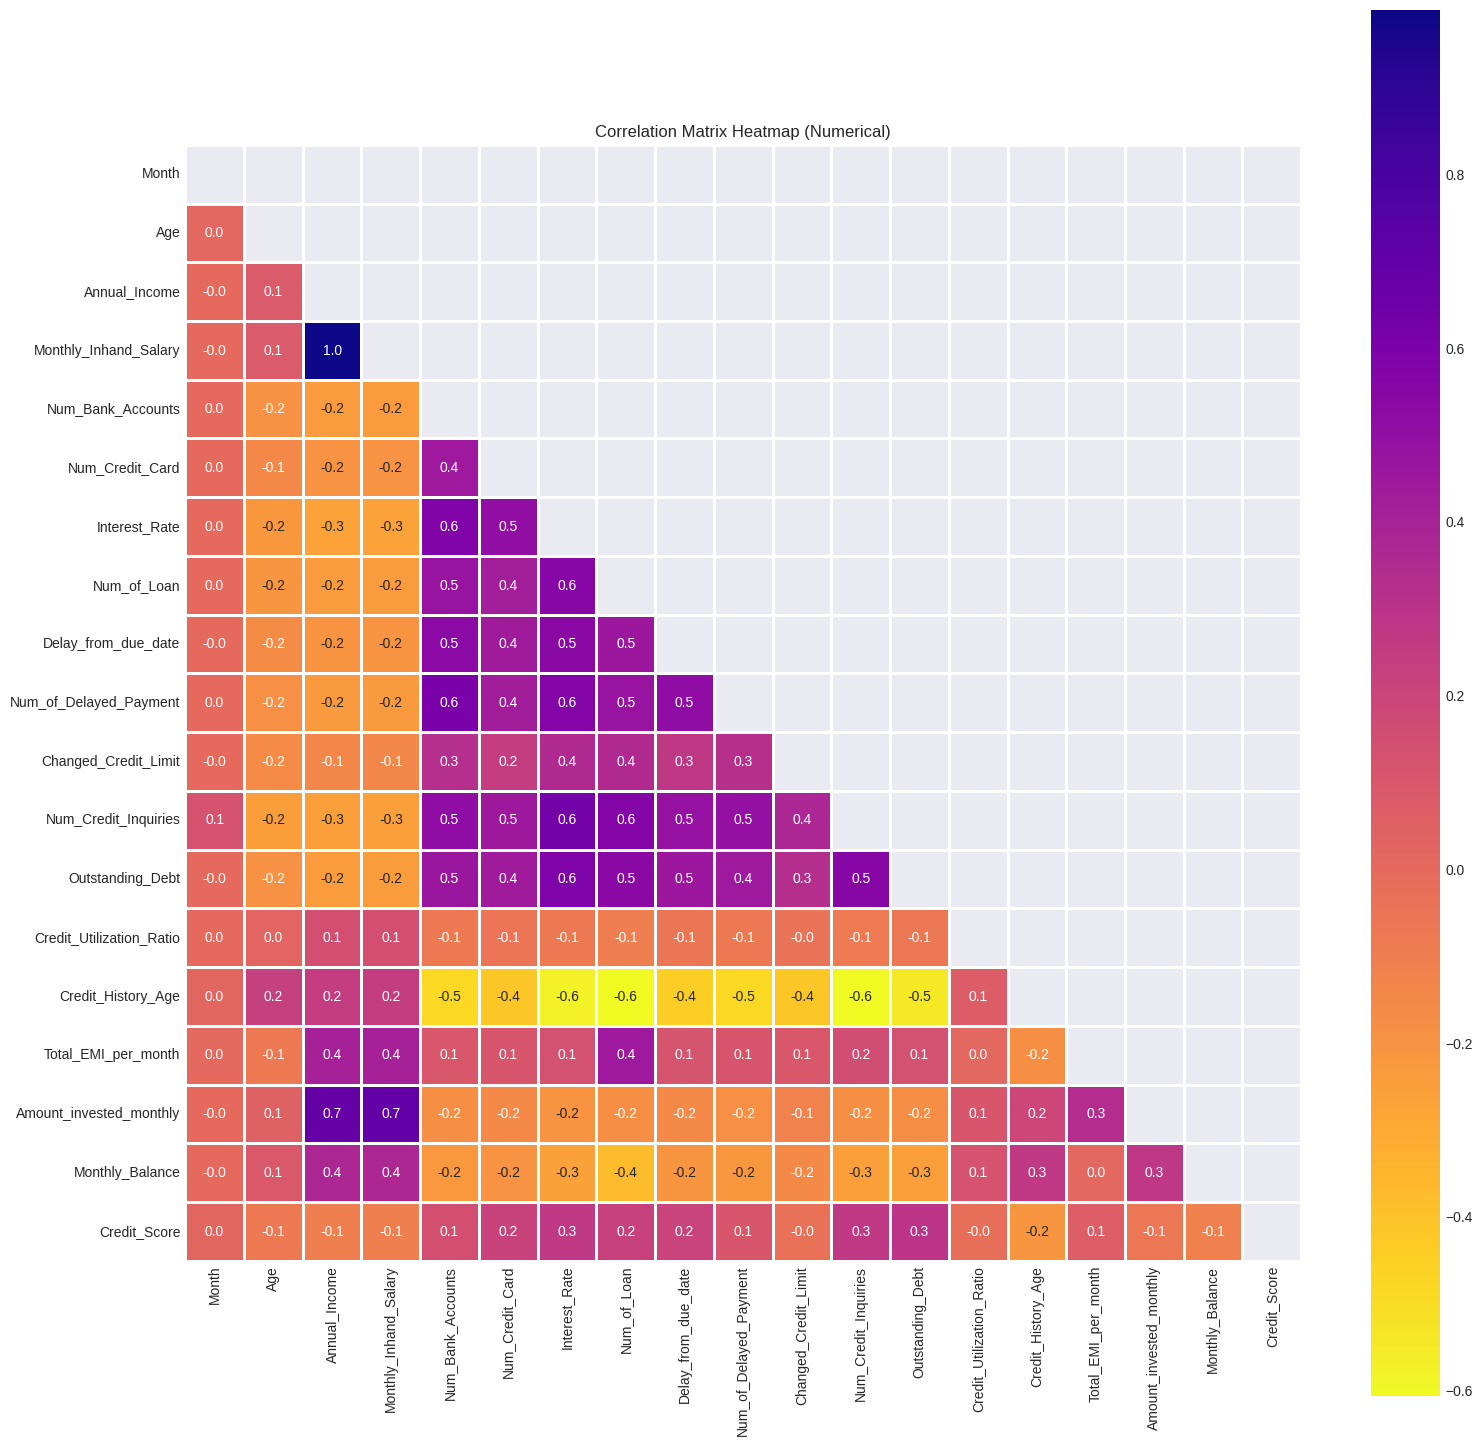

In [14]:
# Create a copy of the original dataframe
credit_df_copy = credit_df.copy()

# Replace categorical values in 'Credit_Score' with numerical values
credit_df_copy['Credit_Score'] = credit_df_copy['Credit_Score'].replace(
    {'Standard':0,'Good':1,'Poor':2}
)

# Create correlational matrix
correlation_matrix = credit_df_copy.select_dtypes(exclude='object').corr()

# Set the figure size for the heatmap
plt.figure(figsize=(18,18))

# Create a heatmap for the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True,linewidth=1,
            square=True, cmap='plasma_r', fmt='.1f',mask=mask)

# Set the title of the plot
plt.title('Correlation Matrix Heatmap (Numerical)')

# Display the plot
plt.show()

<p>The findings of collinearity among numerical features and their relationship with the target variables are as follows:</p>
<ul>
    <li>Positive Linearity:</li>
    <ul>
        <li><b>Monthly_inhand_salary</b> and <b>Annual_Income</b> exhibit a very strong positive linear relationship.</li>
        <li><b>Amount_invested_monthly</b> shows a strong positive linear relationship with <b>Annual_Income</b> and <b>Monthly_inhand_salary</b>.</li>
        <li><b>Num_Bank_Accounts</b> display a mild positive linear relationship with <b>Interest_Rate</b> and <b>Num_of_Delayed_Payment</b>.</li>
        <li><b>Interest_Rate</b> demonstrates a mild positive linear relationship with <b>Num_of_Loan, Num_of_Delayed_Payment, Num_Credit_Inquiries</b> and <b>Outstanding_Debt</b>.</li>
        <li><b>Num_Credit_Inquiries</b> exhibit a mild positive linear relationship with <b>Num_of_Loan</b>.</li>
    </ul>
    <li>Negative linearity:</li>
    <ul>
        <li><b>Credit_History_Age</b> shows a mild negative linear relationship with <b>Interest_Rate, Num_of_Loan</b> and <b>Num_Credit_Inquiries</b>.</li>
    </ul>    
</ul>

#### Pairplot

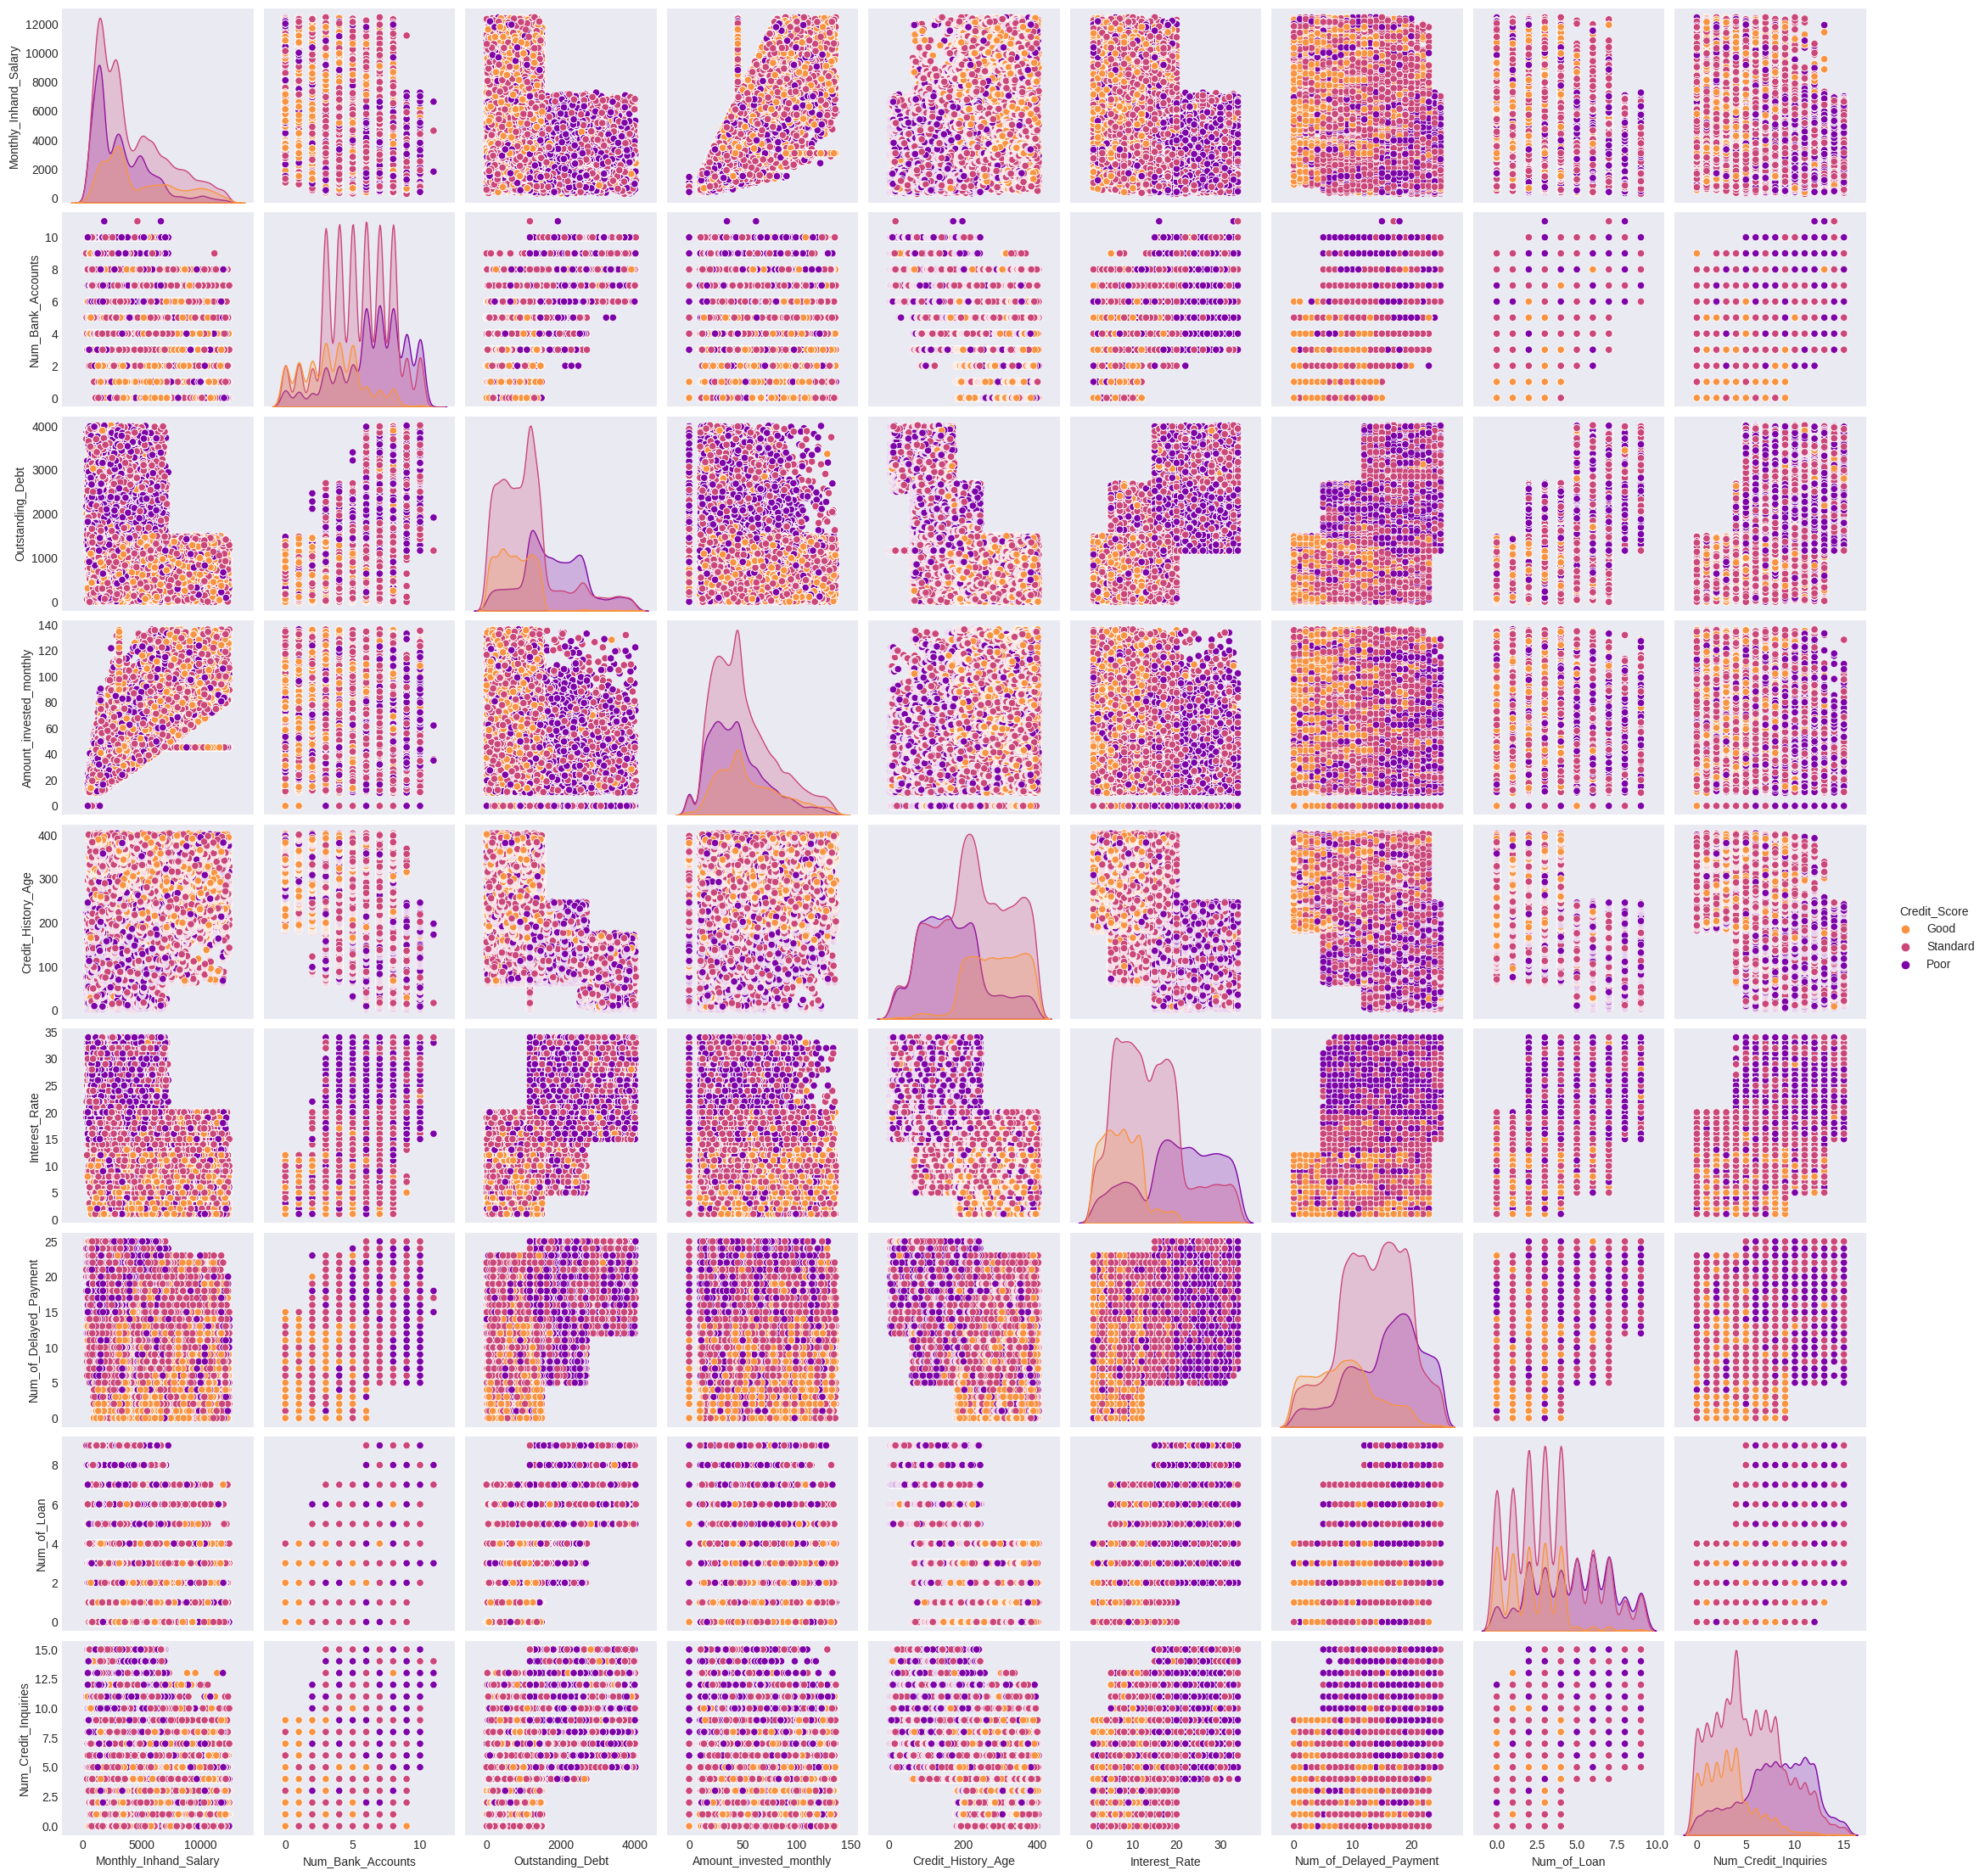

In [12]:
# Define columns to plot
col = ['Monthly_Inhand_Salary', 'Num_Bank_Accounts','Outstanding_Debt',
      'Amount_invested_monthly','Credit_History_Age', 'Interest_Rate',
       'Num_of_Delayed_Payment','Num_of_Loan','Num_Credit_Inquiries','Credit_Score']

# Suppress the specific warning
warnings.filterwarnings("ignore",
                        message="The figure layout has changed to tight")

# Create pairplot
sns.pairplot(credit_df[col], hue='Credit_Score', palette='plasma_r')

# Display the plot
plt.show()

The findings from pairplot visualization:
<ul>
    <li><b>Monthly_inhand_salary</b> against <b>Outstanding_Debt</b> which does not give much details, but it shows who has less <b>Outstanding_Debt</b> have more <em>'good'</em> <b>Credit_Score</b>.</li>
    <li>Customers who has high <b>Montly_inhand_salary</b> do invest monthly certain amount.</li>
    <li>Higher the number of bank accounts the more they delay the payment, which also reflect in Credit_Score.</li>
    <li>Customers who have long time with the organisation only keep less bank accounts.</li>
    <li><b>Outstanding_Debt</b> increases with <b>Interest_Rate</b>, whic also positively align with <b>Credit_Score</b>.</li>
</ul>

### Analysis Upon Domain Knowledge

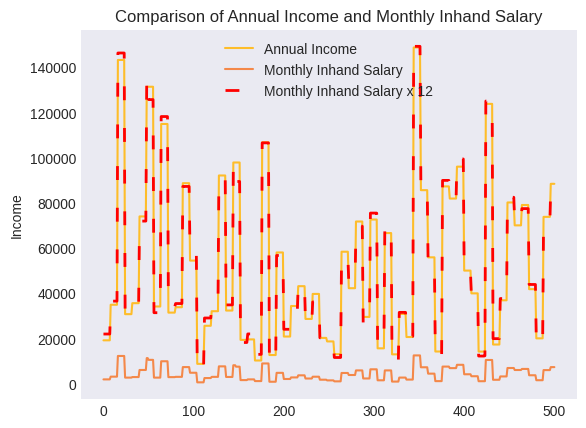

In [17]:
# Define custome color palette
custom_palette = sns.color_palette("plasma_r")

# Plot the values between 'Annual_Income' and 'Monthly_Inhand_Salary'
credit_df.loc[:500,['Annual_Income','Monthly_Inhand_Salary']].plot(
    color=custom_palette)
plt.plot(range(0,501),credit_df.loc[:500,'Monthly_Inhand_Salary']*12,
         linestyle=(0,(5,10)), linewidth=2, c='r')

# Set legend
plt.legend(['Annual Income', 'Monthly Inhand Salary',
            'Monthly Inhand Salary x 12'], loc=9)

# Set title
plt.title('Comparison of Annual Income and Monthly Inhand Salary')

# Set label
plt.ylabel("Income")

# Display the plot
plt.show()

<p>As shown in the plot between  <b>Annual_Income</b> and <b>Monthly_Inhand_Salary</b> which is almost perfectly linear in nature, the former is approximately 12 times the latter in most cases. Therefore, using only <b>Monthly_Inhand_Salary</b> would be sufficient for our analysis.</p>

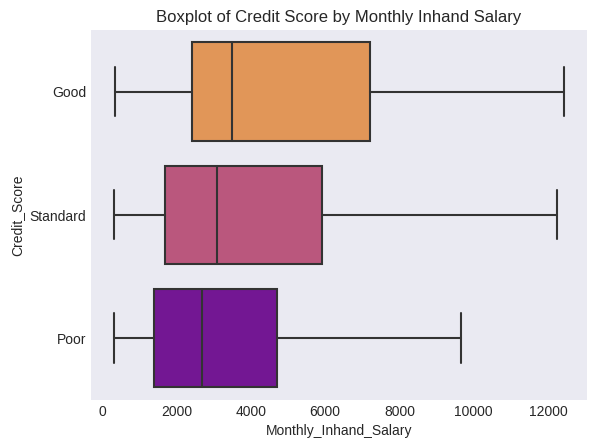

In [19]:
# Create boxplot for target variable using 'Monthly_Inhand_Salary' and 'Credit_Score'
sns.boxplot(data=credit_df, x='Monthly_Inhand_Salary', y='Credit_Score',
            sym="", palette='plasma_r')

# Set title for the plot
plt.title("Boxplot of Credit Score by Monthly Inhand Salary")

# Displat the plot
plt.show()

<p>Customers who have a higher Monthly_inhand_salary tend to have a <em>'Good'</em> <b>Credit_Score</b>, followed by <em>'Standard'</em> and <em>'Poor,</em>' respectively. The mean of each <b>Credit_Score</b> for individuals is nearly at the same level.</p>

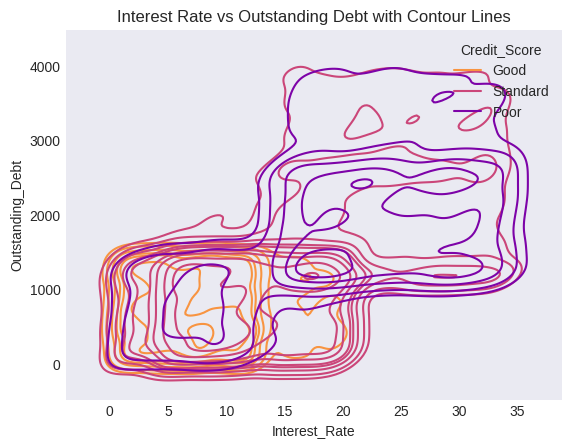

In [18]:
# Create kde plot between 'Interest_Rate', 'Outstanding_Debt' and 'Credit_Score'
ax = sns.kdeplot(x=credit_df["Interest_Rate"],y=credit_df["Outstanding_Debt"],
            hue=credit_df['Credit_Score'], palette='plasma_r')

# Set the title of the plot
plt.title('Interest Rate vs Outstanding Debt with Contour Lines')

# Display the plot
plt.show()

<p>The contour line shows the distribution of data values in each class. When comparing Outstanding_Debt against <b>Interest_Rate</b>, it is observed that the Standard class has more data values following the <em>'Good'</em> class. However, in the <em>'Poor'</em> class, as the <b>Interest_Rate</b> increases, the <b>Outstanding_Debt</b> also increases.</p>

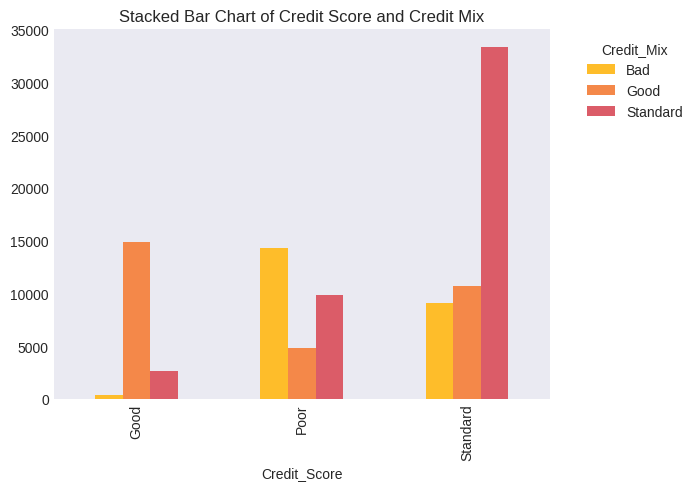

In [20]:
# Set color palette
sns.set_palette("plasma_r")

# Group the data by 'Credit_Score' and 'Credit_Mix', and plot the stacked bar chart
group = ['Credit_Score', 'Credit_Mix']
credit_df.groupby(group).size().unstack().plot.bar()

# Add a legend with a title and adjust the position
plt.legend(title='Credit_Mix', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add a title to the plot
plt.title('Stacked Bar Chart of Credit Score and Credit Mix')

# Display the plot
plt.show()

<p>A <em>'Good'</em> <b>Credit_Score</b> is associated with a majority of <em>'Good'</em> <b>Credit_Mix</b>, and the same trend follows for both <em>'Standard'</em> and <em>'Poor'</em> categories. This indicates that <b>Credit_Score</b> and <b>Credit_Mix</b> have a positive collinear relationship.</p>

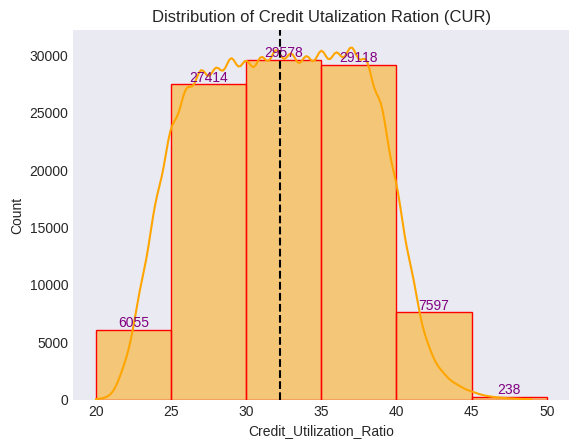

In [15]:
# Create a histogram plot for the rounded Credit Utilization Ratio data
ax = sns.histplot(round(credit_df.Credit_Utilization_Ratio),
                  bins=[20,25,30,35,40,45,50], edgecolor='red',
                  kde=True, color='orange')

# Add labels to the bars in the histogram
ax.bar_label(ax.containers[0], fontsize=10, color='purple')

# Calculate the mean
mean_ratio = credit_df.Credit_Utilization_Ratio.mean()

# Add a vertical line for the mean
ax.axvline(mean_ratio, color='k', linestyle='--', label='Mean Credit Utilization Ratio')

# Set title for the plot
plt.title("Distribution of Credit Utalization Ration (CUR)")

# Display the plot
plt.show()

$Credit Utalization Ration, CUR = \frac{Total Outstanding Debt}{Total Credit Limit}$

<br>
<p>The distribution curve is similar to the bell curve of a normal distribution. Additionally, the fact that the mean of the distribution is equal to the median indicates that it has optimal variance.</p>

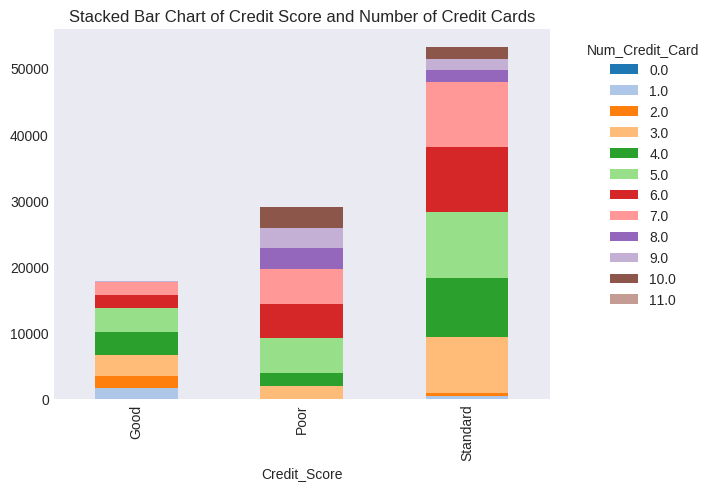

In [22]:
# Set color palette
sns.set_palette("tab20")

# Group the data by 'Credit_Score' and 'Num_Credit_Card', and plot the stacked bar chart
group = ['Credit_Score', 'Num_Credit_Card']
credit_df.groupby(group).size().unstack().plot.bar(stacked=True)

# Add a legend with a title and adjust the position
plt.legend(title='Num_Credit_Card', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add a title to the plot
plt.title('Stacked Bar Chart of Credit Score and Number of Credit Cards')

# Display the plot
plt.show()

<ul>
    <li>Customers with one or two credit cards have <em>'Good'</em> <b>Credit Score</b>.</li>
    <li>Customers who have more than two credit cards mostly have a <em>'Standard'</em> credit score, but some also have a <em>'Poor'</em> credit score.</li>
</ul>

### Summary of Analysis

<p>The presence of a linear relationship within our dataset is not readily apparent. While certain features exhibit linearity with each other, identifying collinearity with our target variable proves to be challenging. Nonetheless, given that our model is a classification model, the prominence of collinearity may not be as critical as in a regression model. Despite this, we have discerned patterns among our features that demonstrate some association with the classes of our target variable.</p>

# Feature Extraction
In the perspective of the domain-knowledge, Outstanding_Debt is proportional to CUR. So it may be helpful the presence of he proportionality in our dataset.

In [15]:
# Extract a new feature
credit_df['Credit_Used'] = (credit_df['Outstanding_Debt'] * credit_df['Credit_Utilization_Ratio'])/100

# Keeping the Customer_ID as category
credit_df['Customer_ID'] = credit_df['Customer_ID'].astype('category')

# Data Spliting, Encoding & Sampling
<p>We will partition our dataset into three distinct subsets: 60% for training, 20% for testing, and another 20% for validation purposes. This allocation will allow us to effectively train our model, rigorously test its performance, and validate its generalization capabilities.</p>


In [16]:
# Split the dataset into features (X) and target variable (y)
X = credit_df.drop('Credit_Score',axis=1)
y = credit_df['Credit_Score']

# Split the dataset into training and testing sets (e.g., 60% train, 40% test)
X_train, X_test, y_train, y_test = split(X,y, train_size=0.6,
                                                   random_state=13, stratify=y)

# Split the traing dataset into training and validating sets (e.g., 50% test, 50% validate)
X_test, X_val, y_test, y_val = split(X_test,y_test, test_size=0.5,
                                                   random_state=13)

In [17]:
#Encode the necessary columns
encoder = OrdinalEncoder(dtype='int64')
cat_columns = X_train.select_dtypes(include='object').columns

for dataframe in [X_train,X_test,X_val]:
    dataframe[cat_columns] = encoder.fit_transform(dataframe[cat_columns])

Balancing the dataset using Random Samper for Under Sampling and Over Sampling

In [18]:
# Sample the dataset to make balanced
under_sample = {'Standard': 25000}
over_sample = {'Good':25000,'Poor':25000}
pipe = make_pipeline(
    RandomUnderSampler(sampling_strategy= under_sample , random_state=13),
    RandomOverSampler(sampling_strategy= over_sample, random_state=13)
)

X_train_samp,y_train_samp = pipe.fit_resample(X_train, y_train)

In [19]:
print(round(y_train_samp.value_counts(normalize=True)*100,2))

Credit_Score
Good        33.33
Poor        33.33
Standard    33.33
Name: proportion, dtype: float64


In [20]:
print(round(y_train.value_counts(normalize=False)))

Credit_Score
Standard    31904
Poor        17399
Good        10697
Name: count, dtype: int64


## Feature Selection
To select important feature trying Recursive Feature Elimination Approach

In [19]:
selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=12)
selector = selector.fit(X_train_samp,y_train_samp)
col = [string for string, flag in zip(X_train_samp.columns, selector.support_) if flag]

[string for string, flag in zip(X_train.columns, selector.support_) if flag]

['Customer_ID',
 'Monthly_Inhand_Salary',
 'Interest_Rate',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Amount_invested_monthly',
 'Credit_Used']

### Feature Importance
In the case of tree classifiers or bagging classifiers, access feature importance method would be easier and helpful

Feature ranking:
1. feature 16 (0.148312)
2. feature 15 (0.105256)
3. feature 11 (0.075258)
4. feature 18 (0.057719)
5. feature 8 (0.055337)
6. feature 13 (0.046494)
7. feature 17 (0.042156)
8. feature 24 (0.041179)
9. feature 1 (0.039118)
10. feature 10 (0.036453)
11. feature 0 (0.035972)
12. feature 21 (0.034394)
13. feature 12 (0.033781)
14. feature 2 (0.032666)
15. feature 20 (0.031022)
16. feature 4 (0.028797)
17. feature 5 (0.028267)
18. feature 7 (0.027846)
19. feature 14 (0.022384)
20. feature 3 (0.020943)
21. feature 22 (0.019858)
22. feature 6 (0.017727)
23. feature 9 (0.013561)
24. feature 19 (0.005498)
25. feature 23 (0.000000)


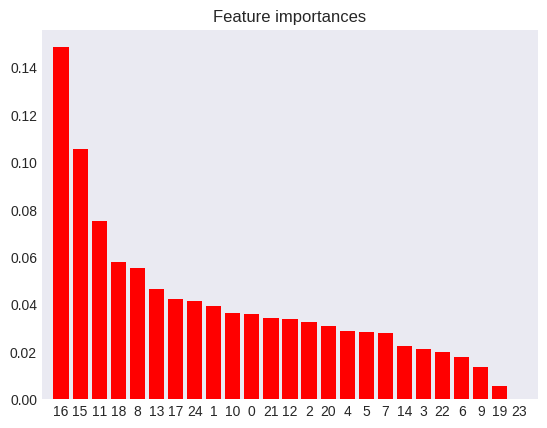

In [19]:
# Initialize a Random Forest classifier
rf_clf = DecisionTreeClassifier( random_state=13)

# Fit the classifier to the training data
rf_clf.fit(X_train, y_train)
# Get feature importances
importances = rf_clf.feature_importances_

# Get the indices of the features in descending order of importance
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

### Feature Extraction Using PCA

In [22]:
# Then, create and fit the PCA model
pca = PCA(n_components=12)  # Specify the number of components you want to keep

X_train_pca = pca.fit_transform(X_train_samp)

X_test_pca = pca.transform(X_test)

# You can also access the principal components and the explained variance ratio
principal_components = pca.components_
explained_variance_ratio = pca.explained_variance_ratio_

# Checking the accuracy score using RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train_pca,y_train_samp)
clf.score(X_test_pca,y_test)

0.77855

In [21]:
pd.DataFrame(pca.components_, columns=X_train_samp.columns).abs().sum(axis=0).sort_values(ascending=False)

Credit_History_Age          1.404172
Credit_Used                 1.397484
Outstanding_Debt            1.333836
Total_EMI_per_month         1.294126
Monthly_Inhand_Salary       1.102953
Annual_Income               1.091619
Type_of_Loan                1.015476
Customer_ID                 1.009433
Credit_Utilization_Ratio    0.068492
Amount_invested_monthly     0.052089
Delay_from_due_date         0.042762
Interest_Rate               0.042661
Num_of_Delayed_Payment      0.028985
Num_of_Loan                 0.026826
Changed_Credit_Limit        0.023866
Age                         0.023164
Num_Credit_Inquiries        0.019098
Num_Bank_Accounts           0.011768
Num_Credit_Card             0.007479
Payment_Behaviour           0.004122
Payment_of_Min_Amount       0.002699
Credit_Mix                  0.002059
Month                       0.001451
Occupation                  0.000822
Monthly_Balance             0.000000
dtype: float64

Using PCA doeas reduce number of features to a preferred number, but It also reduce accuracy score, which make it discourage to use further.

# Model Selection

In [28]:
linear_clf = [LogisticRegression(max_iter=200),
      SGDClassifier()]

linear_pipelines = [
    Pipeline(
    [('scaler',StandardScaler()),
    ('RFE', RFE(estimator=linear_clf[0], n_features_to_select=7)),
    ('model',linear_clf[0])]
    ),
    Pipeline(
    [('scaler',StandardScaler()),
    ('RFE', RFE(estimator=linear_clf[1], n_features_to_select=7)),
    ('model',linear_clf[1])]
    )  
]

In [37]:
[string for string, flag in zip(X_train.columns,linear_pipelines.named_steps['RFE'].support_ ) if flag]

In [36]:
# You can correct the code as follows
result = []
for pipeline in linear_pipelines:
    pipeline.fit(X_train_samp, y_train_samp)
    selected_features = [col for col, flag in zip(X_train.columns, pipeline.named_steps['RFE'].support_) if flag]
    result.append(selected_features)

print(result)

[['Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt'], ['Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Credit_Mix', 'Outstanding_Debt', 'Payment_of_Min_Amount']]


In [34]:
num_col = [16,15,8,18,0,4,20] 
tree_clf = [DecisionTreeClassifier(criterion='entropy', max_depth=300),
      ExtraTreeClassifier(criterion='entropy')]

tree_pipelines = [
    Pipeline(
    [
    ('model',tree_clf[0])]
    ),
    Pipeline(
    [
    ('model',tree_clf[1])]
    )  
]

In [25]:
num_col_ensemble = [16,15,8,18,11,13,7,12,21,0,1,5,4,14,20] 
ensemble_clf = [RandomForestClassifier(criterion='gini')]

ensemble_pipelines = [
    Pipeline(
    [
    ('model',ensemble_clf[0])]
    )
]

In [87]:
catboost = CatBoostClassifier(
    iterations=2000, learning_rate=0.1, depth=10, loss_function='MultiClass', verbose=False)

X_train_samp['Customer_ID'] = X_train_samp['Customer_ID'].astype('object')
X_test['Customer_ID'] = X_test['Customer_ID'].astype('object')

## Model Training and Evaluation

In [35]:
print("Linear Classifier Evaluation:\n",'-'*60)
for i, pipeline in enumerate(linear_pipelines):
    pipeline.fit(X_train_samp, y_train_samp)
    accuracy = pipeline.score(X_test, y_test)
    print(f"Accuracy of pipeline {i+1}: {accuracy:.2f}")

    # Generate classification report
    y_pred = pipeline.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(f"Classification Report for pipeline {i+1} {type(pipeline).__name__}:\n{report}\n")

Linear Classifier Evaluation:
 ------------------------------------------------------------
Accuracy of pipeline 1: 0.65
Classification Report for pipeline 1 Pipeline:
              precision    recall  f1-score   support

        Good       0.49      0.81      0.61      3550
        Poor       0.63      0.70      0.66      5796
    Standard       0.81      0.58      0.67     10654

    accuracy                           0.65     20000
   macro avg       0.64      0.70      0.65     20000
weighted avg       0.70      0.65      0.66     20000


Accuracy of pipeline 2: 0.64
Classification Report for pipeline 2 Pipeline:
              precision    recall  f1-score   support

        Good       0.47      0.84      0.60      3550
        Poor       0.62      0.66      0.64      5796
    Standard       0.81      0.57      0.67     10654

    accuracy                           0.64     20000
   macro avg       0.63      0.69      0.64     20000
weighted avg       0.69      0.64      0.65     

In [72]:
print("Tree Classifier Evaluation:\n",'-'*60)
for i, pipeline in enumerate(tree_pipelines):
    pipeline.fit(X_train_samp.iloc[:,num_col], y_train_samp)
    accuracy = pipeline.score(X_test.iloc[:,num_col], y_test)
    print(f"Accuracy of pipeline {i+1}: {accuracy:.2f}")

    # Generate classification report
    y_pred = pipeline.predict(X_test.iloc[:,num_col])
    report = classification_report(y_test, y_pred)
    print(f"Classification Report for pipeline {i+1}:\n{report}\n")

Tree Classifier Evaluation:
 ------------------------------------------------------------
Accuracy of pipeline 1: 0.81
Classification Report for pipeline 1:
              precision    recall  f1-score   support

        Good       0.76      0.81      0.78      3550
        Poor       0.78      0.83      0.81      5796
    Standard       0.84      0.79      0.82     10654

    accuracy                           0.81     20000
   macro avg       0.79      0.81      0.80     20000
weighted avg       0.81      0.81      0.81     20000


Accuracy of pipeline 2: 0.80
Classification Report for pipeline 2:
              precision    recall  f1-score   support

        Good       0.75      0.79      0.77      3550
        Poor       0.77      0.82      0.80      5796
    Standard       0.83      0.79      0.81     10654

    accuracy                           0.80     20000
   macro avg       0.78      0.80      0.79     20000
weighted avg       0.80      0.80      0.80     20000




In [75]:
print("Ensemble Classifier Evaluation:\n",'-'*60)
for i, pipeline in enumerate(ensemble_pipelines):
    pipeline.fit(X_train_samp.iloc[:,num_col], y_train_samp)
    accuracy = pipeline.score(X_test.iloc[:,num_col], y_test)
    print(f"Accuracy of pipeline {i+1}: {accuracy:.2f}")

    # Generate classification report
    y_pred = pipeline.predict(X_test.iloc[:,num_col])
    report = classification_report(y_test, y_pred)
    print(f"Classification Report for pipeline {i+1}:\n{report}\n")

Ensemble Classifier Evaluation:
 ------------------------------------------------------------
Accuracy of pipeline 1: 0.82
Classification Report for pipeline 1:
              precision    recall  f1-score   support

        Good       0.77      0.82      0.79      3550
        Poor       0.80      0.84      0.82      5796
    Standard       0.85      0.80      0.82     10654

    accuracy                           0.82     20000
   macro avg       0.80      0.82      0.81     20000
weighted avg       0.82      0.82      0.82     20000




In [89]:
print("Boosting Classifier Evaluation:\n",'-'*60)
catboost.fit(X_train_samp, y_train_samp)
accuracy = catboost.score(X_test, y_test)
print(f"Accuracy of model: {accuracy:.2f}")

# Generate classification report
y_pred = catboost.predict(X_test)
report = classification_report(y_test, y_pred)
print(f"Classification Report for model:\n{report}\n")

Boosting Classifier Evaluation:
 ------------------------------------------------------------
Accuracy of model: 0.81
Classification Report for model:
              precision    recall  f1-score   support

        Good       0.74      0.84      0.79      3550
        Poor       0.78      0.85      0.81      5796
    Standard       0.87      0.78      0.82     10654

    accuracy                           0.81     20000
   macro avg       0.79      0.82      0.81     20000
weighted avg       0.82      0.81      0.81     20000




### Section Conclusive Analysis
At the end of initial evaluations, the conclusions are follows:
- Linear Algorithms are not performing well which ensurings the conclusions from EDA.
- SVC model is slow on our dataset, also the score is not good enough.
- Random Forest Classifier and Catboost models gave highest score, <br> those models are most suitable for further steps.

# Feature Importance for Ensemble Classifier

In [39]:
# Assuming X_train and y_train are your training data
# Assuming X_test is your test data
# Assuming features_list contains the list of feature names

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier to the training data
rf_classifier.fit(X_train_samp, y_train_samp)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

features_list = X_train_samp.columns

# Create a dictionary of feature importances with their respective feature names
feature_importance_dict = dict(zip(features_list, feature_importances))

# Sort the feature importances in descending order
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the sorted feature importances
for feature, importance in sorted_feature_importances:
    print(f"Feature: {feature}, Importance: {importance:.4f}")

Feature: Interest_Rate, Importance: 0.0829
Feature: Outstanding_Debt, Importance: 0.0819
Feature: Credit_Mix, Importance: 0.0800
Feature: Credit_History_Age, Importance: 0.0731
Feature: Delay_from_due_date, Importance: 0.0582
Feature: Credit_Used, Importance: 0.0564
Feature: Changed_Credit_Limit, Importance: 0.0411
Feature: Payment_of_Min_Amount, Importance: 0.0391
Feature: Month, Importance: 0.0375
Feature: Num_Credit_Inquiries, Importance: 0.0355
Feature: Num_Bank_Accounts, Importance: 0.0354
Feature: Credit_Utilization_Ratio, Importance: 0.0347
Feature: Amount_invested_monthly, Importance: 0.0334
Feature: Customer_ID, Importance: 0.0331
Feature: Num_of_Delayed_Payment, Importance: 0.0326
Feature: Annual_Income, Importance: 0.0319
Feature: Monthly_Inhand_Salary, Importance: 0.0317
Feature: Total_EMI_per_month, Importance: 0.0303
Feature: Num_Credit_Card, Importance: 0.0301
Feature: Type_of_Loan, Importance: 0.0301
Feature: Age, Importance: 0.0295
Feature: Occupation, Importance: 0.02

In [22]:
 X_train_samp.columns[ensemble_pipelines.named_steps['select'].get_support()]

Index(['Interest_Rate', 'Delay_from_due_date', 'Changed_Credit_Limit',
       'Credit_Mix', 'Outstanding_Debt', 'Credit_History_Age', 'Credit_Used'],
      dtype='object')

# Hypertuning

## Randomized Hypertuning

In [23]:
num_col_ensemble = [16,15,8,18,11,13,7,12,21,0,1,5,4,14,20] 
# ensemble_clf = RandomForestClassifier()

# ensemble_clf = Pipeline([
#     ('scaler', StandardScaler()),  # Include a scaler in the pipeline
#     ('clf', RandomForestClassifier())  # Classifier
# ])
ensemble_clf = RandomForestClassifier()


# Define the hyperparameters and their ranges for RandomizedSearchCV
param_dist = {
    "n_estimators": randint(100, 1000),
    "max_features": [None, 'sqrt', 'log2'],
    "max_depth": [10, 20, 30, 40, 50, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False],
    "criterion":['gini','entropy','log_loss']
}

warnings.filterwarnings("ignore", message="A worker stopped while some jobs were given to the executor", category=UserWarning)

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(ensemble_clf, param_distributions=param_dist, n_iter=10, cv=3, verbose=2, random_state=13, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_samp.iloc[:, num_col_ensemble], y_train_samp)

# Get the best parameters from RandomizedSearchCV
best_params = random_search.best_params_
print("Best parameters from RandomizedSearchCV:", best_params)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=856; total time=13.6min
[CV] END bootstrap=False, criterion=entropy, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=758; total time= 6.5min
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=856; total time=13.7min
[CV] END bootstrap=False, criterion=entropy, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=758; total time= 6.5min
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=538; total time= 2.9min
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=538; total time= 2.9min
[CV] END boot

In [24]:
best_params

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 40,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 758}

In [17]:
best_params = {'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 40,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 758}


## Grid Hypertuning

In [21]:
# Define the hyperparameters grid for GridSearchCV based on the best parameters from RandomizedSearchCV
# {'bootstrap': False,
#  'criterion': 'entropy',
#  'max_depth': 40,
#  'max_features': 'log2',
#  'min_samples_leaf': 2,
#  'min_samples_split': 5,
#  'n_estimators': 758}

ensemble_clf = RandomForestClassifier()
num_col_ensemble = [16,15,8,18,11,13,7,12,21,0,1,5,4,14,20] 

param_grid = {
    "n_estimators": [best_params['n_estimators'] - 200, best_params['n_estimators'], best_params['n_estimators'] + 200],
    "max_features": [best_params['max_features']],
    "max_depth": [best_params['max_depth'], best_params['max_depth'] + 10, best_params['max_depth'] + 20],
    "min_samples_split": [best_params['min_samples_split'] - 1, best_params['min_samples_split'], best_params['min_samples_split'] + 1],
    "min_samples_leaf": [best_params['min_samples_leaf'] - 1, best_params['min_samples_leaf'], best_params['min_samples_leaf'] + 1],
    "bootstrap": [best_params['bootstrap']],
    "criterion":[best_params['criterion']]
}

warnings.filterwarnings("ignore", message="A worker stopped while some jobs were given to the executor", category=UserWarning)

# Create a GridSearchCV object
grid_search = GridSearchCV(ensemble_clf, param_grid=param_grid, cv=3, n_jobs=1, verbose=2)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train_samp.iloc[:, num_col_ensemble], y_train_samp)

# Get the best parameters from GridSearchCV
best_params_grid = grid_search.best_params_
print("Best parameters from GridSearchCV:", best_params_grid)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END bootstrap=False, criterion=entropy, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=558; total time= 2.4min
[CV] END bootstrap=False, criterion=entropy, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=558; total time= 2.5min
[CV] END bootstrap=False, criterion=entropy, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=558; total time= 2.6min
[CV] END bootstrap=False, criterion=entropy, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=758; total time= 3.3min
[CV] END bootstrap=False, criterion=entropy, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=758; total time= 3.4min
[CV] END bootstrap=False, criterion=entropy, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=758; total time= 3.6min
[C

In [22]:
best_params_grid

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 50,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 958}

In [25]:
para2 = {'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 40,
 'max_features': ['log2'],
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 758}
num_col_ensemble = [16,15,8,18,11,13,7,12,21,0,1,5,4,14,20] 
ensemble_clf = RandomForestClassifier(**para2)

print("Ensemble Classifier Evaluation:\n",'-'*60)
ensemble_clf.fit(X_train_samp.iloc[:,num_col_ensemble], y_train_samp)
accuracy = ensemble_clf.score(X_test.iloc[:,num_col_ensemble], y_test)
print(f"Accuracy of pipeline {i+1}: {accuracy:.2f}")

# Generate classification report
y_pred = ensemble_clf.predict(X_test.iloc[:,num_col_ensemble])
report = classification_report(y_test, y_pred)
print(f"Classification Report for pipeline {i+1}:\n{report}\n")

Ensemble Classifier Evaluation:
 ------------------------------------------------------------
Accuracy of pipeline 10: 0.83
Classification Report for pipeline 10:
              precision    recall  f1-score   support

        Good       0.77      0.86      0.81      3550
        Poor       0.80      0.87      0.83      5796
    Standard       0.88      0.80      0.84     10654

    accuracy                           0.83     20000
   macro avg       0.81      0.84      0.83     20000
weighted avg       0.84      0.83      0.83     20000




In [25]:
para3 = {'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 50,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 958}

# {'bootstrap': False,
#  'criterion': 'entropy',
#  'max_depth': 50,
#  'max_features': 'log2',
#  'min_samples_leaf': 1,
#  'min_samples_split': 4,
#  'n_estimators': 958}
num_col_ensemble = [16,15,8,18,11,13,7,12,21,0,1,5,4,14,20] 
ensemble_clf = RandomForestClassifier(**para3)

print("Ensemble Classifier Evaluation:\n",'-'*60)
ensemble_clf.fit(X_train_samp.iloc[:,num_col_ensemble], y_train_samp)
accuracy = ensemble_clf.score(X_test.iloc[:,num_col_ensemble], y_test)
print(f"Accuracy of pipeline {i+1}: {accuracy:.2f}")

# Generate classification report
y_pred = ensemble_clf.predict(X_test.iloc[:,num_col_ensemble])
report = classification_report(y_test, y_pred)
print(f"Classification Report for pipeline {i+1}:\n{report}\n")

Ensemble Classifier Evaluation:
 ------------------------------------------------------------
Accuracy of pipeline 10: 0.83
Classification Report for pipeline 10:
              precision    recall  f1-score   support

        Good       0.78      0.83      0.80      3550
        Poor       0.80      0.87      0.83      5796
    Standard       0.87      0.81      0.84     10654

    accuracy                           0.83     20000
   macro avg       0.82      0.84      0.82     20000
weighted avg       0.83      0.83      0.83     20000




In [18]:
para2 = {'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 40,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 758}
num_col_ensemble = [16,15,8,18,11,7,12,21,0,1,5,4,14] 
ensemble_clf = RandomForestClassifier(**para2)

print("Testing Classifier Evaluation:\n",'-'*60)
ensemble_clf.fit(X_train_samp.iloc[:,num_col_ensemble], y_train_samp)
accuracy = ensemble_clf.score(X_test.iloc[:,num_col_ensemble], y_test)
print(f"Accuracy of pipeline {i+1}: {accuracy:.2f}")

# Generate classification report
y_pred = ensemble_clf.predict(X_test.iloc[:,num_col_ensemble])
report = classification_report(y_test, y_pred)
print(f"Classification Report for pipeline {i+1}:\n{report}\n")

Testing Classifier Evaluation:
 ------------------------------------------------------------
Accuracy of pipeline 10: 0.83
Classification Report for pipeline 10:
              precision    recall  f1-score   support

        Good       0.77      0.86      0.81      3550
        Poor       0.79      0.87      0.83      5796
    Standard       0.88      0.80      0.84     10654

    accuracy                           0.83     20000
   macro avg       0.81      0.84      0.83     20000
weighted avg       0.84      0.83      0.83     20000




## Cross Validation

Using hypertuned parameters performing cross validation on both test dataset as well as validation dataset.

In [26]:
para2 = {'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 40,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 758}

# Step 1: Train your model using X_train and y_train
model = RandomForestClassifier(**para2)  # Example model, you can use any model of your choice
model.fit(X_train_samp, y_train_samp)

# Step 2: Perform cross-validation using StratifiedKFold to assess the model's performance and tune hyperparameters
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=13)  # Example of 5-fold stratified cross-validation
cv_scores = cross_val_score(model, X_train_samp, y_train_samp, cv=stratified_kfold, scoring='accuracy')
print('Cross-validation scores:', cv_scores)
print('Mean CV accuracy:', cv_scores.mean())

# Step 3: Evaluate the model's final performance using X_val and y_val
y_pred = model.predict(X_val)
final_accuracy = accuracy_score(y_val, y_pred)
print('Final accuracy on validation set:', final_accuracy)

Cross-validation scores: [0.90153333 0.88966667 0.89073333 0.89353333 0.891     ]
Mean CV accuracy: 0.8932933333333333
Final accuracy on validation set: 0.8274


In [23]:
hyper_params = {'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 40,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 758}

# Train the Random Forest model
model = RandomForestClassifier(**hyper_params)  # Example model, you can use any model of your choice
model.fit(X_train_samp, y_train_samp)

# Get feature importances
feature_importances = model.feature_importances_

# Sort the feature importances in descending order
indices = feature_importances.argsort()[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train_samp.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], feature_importances[indices[f]]))

Feature ranking:
1. feature 8 (0.086854)
2. feature 16 (0.085944)
3. feature 15 (0.070799)
4. feature 18 (0.065585)
5. feature 11 (0.059708)
6. feature 24 (0.053370)
7. feature 1 (0.041575)
8. feature 13 (0.040586)
9. feature 7 (0.038695)
10. feature 19 (0.037279)
11. feature 14 (0.034598)
12. feature 4 (0.034286)
13. feature 0 (0.034209)
14. feature 21 (0.034154)
15. feature 5 (0.033564)
16. feature 20 (0.031491)
17. feature 12 (0.031035)
18. feature 10 (0.030743)
19. feature 6 (0.030459)
20. feature 2 (0.030018)
21. feature 17 (0.028067)
22. feature 9 (0.027254)
23. feature 3 (0.023394)
24. feature 22 (0.016333)
25. feature 23 (0.000000)


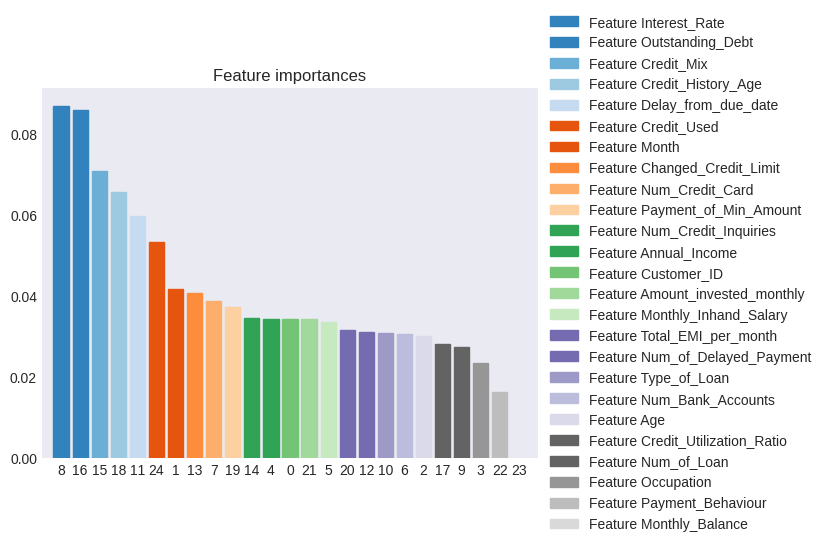

In [24]:
# Plot the feature importances
plt.figure()
plt.title("Feature importances")
bars = plt.bar(range(X_train_samp.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train_samp.shape[1]), indices)


# Set colors for each bar based on indices
colors = plt.cm.tab20c(np.linspace(0, 1, 26))  # Add more colors as needed
for i, bar in enumerate(bars):
    bar.set_color(colors[i % len(colors)])  # Set color for each bar based on its position in the list



plt.xlim([-1, X_train_samp.shape[1]])


feature_names = [f'Feature {X_train.columns[i]}' for i in indices]  # Replace with actual feature names


plt.legend(bars,feature_names,loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlim([-1, X_train_samp.shape[1]])
plt.show()

In [32]:
X_train_samp.iloc[:,[0,1,4,7,8,11,14,15,16,18,21]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Customer_ID              75000 non-null  category
 1   Month                    75000 non-null  int64   
 2   Annual_Income            75000 non-null  float64 
 3   Num_Credit_Card          75000 non-null  float64 
 4   Interest_Rate            75000 non-null  float64 
 5   Delay_from_due_date      75000 non-null  float64 
 6   Num_Credit_Inquiries     75000 non-null  float64 
 7   Credit_Mix               75000 non-null  int64   
 8   Outstanding_Debt         75000 non-null  float64 
 9   Credit_History_Age       75000 non-null  float64 
 10  Amount_invested_monthly  75000 non-null  float64 
dtypes: category(1), float64(8), int64(2)
memory usage: 6.2 MB


In [34]:
para2 = {'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 40,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 758,
 'oob_score':True}
num_col_ensemble = [0,1,4,7,8,11,14,15,16,18,21] 
ensemble_clf = RandomForestClassifier(**para2)

print("Testing Classifier Evaluation:\n",'-'*60)
ensemble_clf.fit(X_train_samp.iloc[:,num_col_ensemble], y_train_samp)
accuracy = ensemble_clf.score(X_test.iloc[:,num_col_ensemble], y_test)
print(f"Accuracy of pipeline {i+1}: {accuracy:.2f}")
print(f"OOB Scoe of pipeline {i+1}: {ensemble_clf.oob_score_:.2f}")

# Generate classification report
y_pred = ensemble_clf.predict(X_test.iloc[:,num_col_ensemble])
report = classification_report(y_test, y_pred)
print(f"Classification Report for pipeline {i+1}:\n{report}\n")

Testing Classifier Evaluation:
 ------------------------------------------------------------
Accuracy of pipeline 10: 0.83
OOB Scoe of pipeline 10: 0.89
Classification Report for pipeline 10:
              precision    recall  f1-score   support

        Good       0.75      0.89      0.81      3550
        Poor       0.77      0.89      0.83      5796
    Standard       0.90      0.77      0.83     10654

    accuracy                           0.83     20000
   macro avg       0.81      0.85      0.82     20000
weighted avg       0.84      0.83      0.83     20000




Using feature importance selected relevent feature both in terms of performance and domain specific relationship.

# Testing Implementation

In [55]:
X_train_samp.iloc[14,[0,1,4,7,8,11,14,15,16,18,21]].to_list()

[20201.0,
 7.0,
 35329.84,
 2.0,
 6.0,
 2.0,
 4.0,
 1.0,
 898.38,
 368.0,
 41.41555474018322]

In [75]:
y_train_samp[13467]

'Poor'

In [17]:
ensemble_clf.predict([X_train_samp.iloc[13467,[0,1,4,7,8,11,14,15,16,18,21]].to_list()])

array(['Poor'], dtype=object)

Testing our model using randomly selected values, and it gave correct classifying value.

# Pickling the Model

In [19]:
pickle.dump(ensemble_clf,open('model.pkl','wb'))